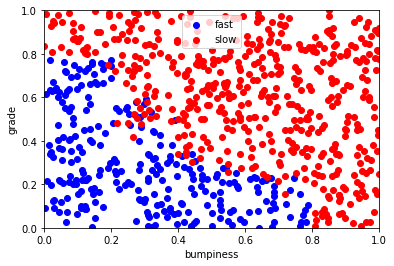

('training time: ', 0.001, 's')
('predicting time: ', 0.003, 's')
accuracy = 0.948


In [26]:
#!/usr/bin/python

import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from time import time
from sklearn.metrics import accuracy_score

#train
t0=time()
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                           metric='minkowski', metric_params=None, n_jobs=1)

clf.fit(features_test, labels_test)
print("training time: ", round(time()-t0, 3), "s")

#predict
t0 = time()
pred = clf.predict(features_test)
print("predicting time: ", round(time()-t0,3), "s")


accuracy = accuracy_score(pred, labels_test)
print ('accuracy = {0}'.format(accuracy))


try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass


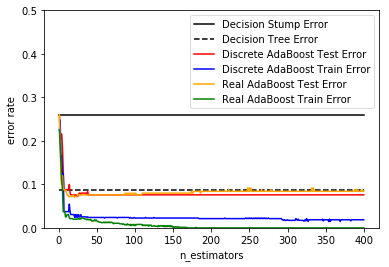